['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']
Logistic Regression Accuracy: 0.787 ROC-AUC: 0.871


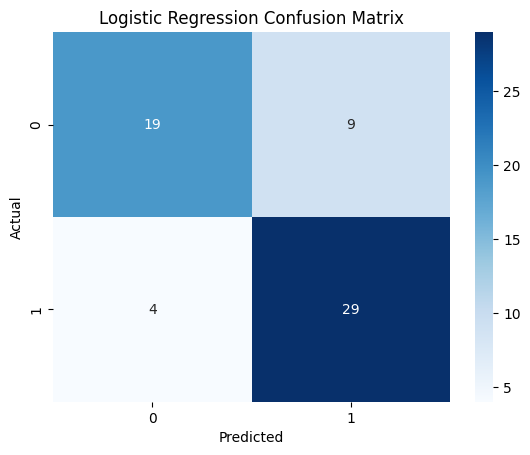

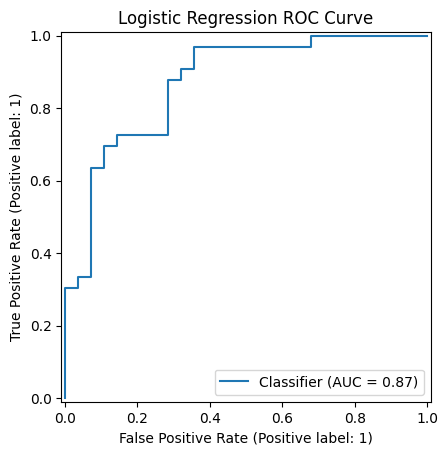

Decision Tree Accuracy: 0.787 ROC-AUC: 0.801


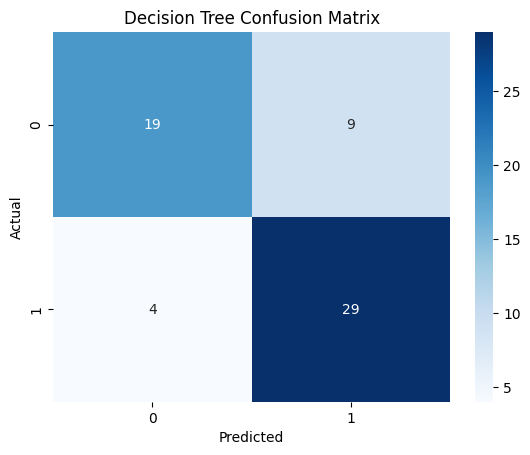

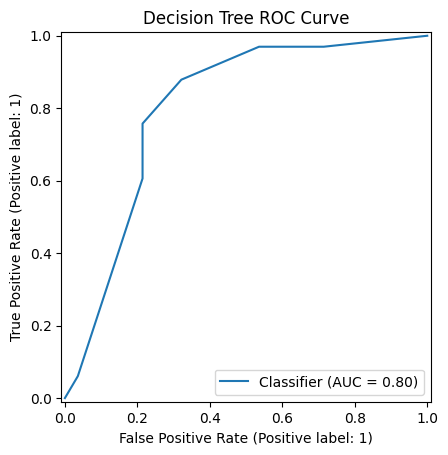

/tmp/ipython-input-497701204.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="feature", x="coef", data=coef_df, palette="coolwarm")


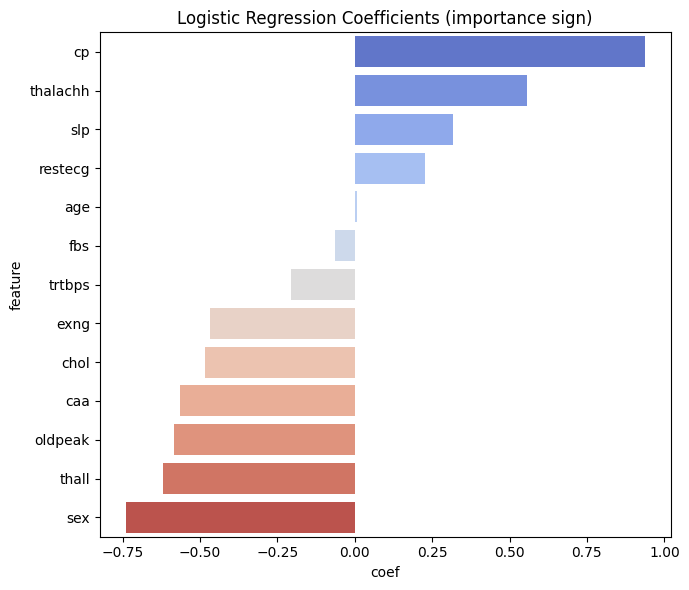

Top positive risk indicators (LR):


,feature,coef
2,cp,0.936240
7,thalachh,0.557740
10,slp,0.317276
6,restecg,0.226912
0,age,0.008173


Top negative indicators (LR):


,feature,coef
4,chol,-0.485082
11,caa,-0.565212
9,oldpeak,-0.584661
12,thall,-0.620505
1,sex,-0.739688


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Correct URL for the heart dataset
url = "https://gist.githubusercontent.com/trantuyen082001/1fc2f5c0ad1507f40e721e6d18b34138/raw/heart.csv"
df = pd.read_csv(url)
print(df.columns.tolist())  # Confirm columns

# Corrected target name
target = "output"
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

lr = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
lr.fit(X_train_s, y_train)
pred_lr = lr.predict(X_test_s)
proba_lr = lr.predict_proba(X_test_s)[:,1]

dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)
proba_dt = dt.predict_proba(X_test)[:,1]

def evaluate(name, y_true, y_pred, y_proba):
  acc = accuracy_score(y_true, y_pred)
  roc = roc_auc_score(y_true, y_proba)
  print(f"{name} Accuracy: {acc:.3f} ROC-AUC: {roc:.3f}")
  cm = confusion_matrix(y_true, y_pred)
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
  plt.title(f"{name} Confusion Matrix")
  plt.xlabel("Predicted"); plt.ylabel("Actual")
  plt.show()
  RocCurveDisplay.from_predictions(y_true, y_proba)
  plt.title(f"{name} ROC Curve")
  plt.show()

evaluate("Logistic Regression", y_test, pred_lr, proba_lr)
evaluate("Decision Tree", y_test, pred_dt, proba_dt)

coef_df = pd.DataFrame({"feature": X.columns, "coef": lr.coef_[0]}).sort_values("coef", ascending=False)
plt.figure(figsize=(7,6))
sns.barplot(y="feature", x="coef", data=coef_df, palette="coolwarm")
plt.title("Logistic Regression Coefficients (importance sign)")
plt.tight_layout(); plt.show()

print("Top positive risk indicators (LR):")
display(coef_df.head(5))
print("Top negative indicators (LR):")
display(coef_df.tail(5))

#Note: This is educational, not medical advice.